Alumno: Luciano Benjamin Recalde Carballo
# Examen Machine Learning

## Carga de datos

In [1]:
import pandas as pd
ds_path = "data/winequality-red.csv"
df_red = pd.read_csv(ds_path, sep = ';')
ds_path = "data/winequality-white.csv"
df_white = pd.read_csv(ds_path, sep = ';')
df_red = df_red.assign(type='red') 
df_white = df_white.assign(type='white')
df = pd.concat([df_red, df_white])

Cargamos los datos en 2 dataframes diferentes, para vinos blancos y para vinos tintos. Utilizamos como separadores los caracteres ";" ya que se observa en los datasets que estos son utilizados.

Luego asignamos una columna llamada "type" a cada dataframe para usarlo como variable categorica y asi poder trabajar con un dataframe que contenga a ambos (Con el fin de agilizar ciertos procesos)

A continuacion visualizaremos la cabecera

In [2]:
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality type  
0      9.4        5  red  
1      9.8        5  red  
2      9.8        5  red  
3      9.8        6  red  
4      9.4        5  red  
5      9.4        5  red  
6      9.4        5  red  
7     10.0        7  red  
8      9.5        7  red  
9     10.5        5  red

In [3]:
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality   type  
4893     11.2        6  white  
4894      9.6        5  white  
4895      9.4        6  white  
4896     12.8        7  white  
4897     11.8        6  white

Visualizamos las ultimas entradas

## Limpieza de datos

### Identificación y eliminación de valores duplicados

Buscamos valores duplicados en los dataframes.

In [4]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")


Registros duplicados en df: 1177


Observamos que existen valores duplicados en el df. Procederemos a eliminarlos y volvemos a buscar duplicados.

In [5]:
df = df.drop_duplicates()
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 0


Se observa que ya no quedan duplicados en el df.

### Estadisticas descriptivas del Dataframe para vinos tintos

Visualizamos las estadisticas descriptivas de las columnas del dataframe, esto lo hacemos para buscar algun tipo de inconsistencia y para entender mejor la naturaleza de nuestro dataframe

In [6]:
print(df.query('type == "red"').describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000         

### Estadisticas descriptivas del Dataframe para vinos blancos

Hacemos lo mismo para vinos blancos

In [7]:
print(df.query('type == "white"').describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.002905   
min       0.009000             2.000000         

No observamos nada fuera de lo comun, si buen algunos promedios se alejan mucho de los valores maximos o minimos, podremos observar este detalle mas adelante en las visualizaciones

### Verificación y ajuste de tipos de datos:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  type                  5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 581.9+ KB


Observamos que todas las columnas corresponden al tipo de dato que contienen, exceptuando la columna que hemos creado para diferenciar el tipo de vino "type". Procedemos a asignar el tipo de dato adecuado.

- Tambien observamos que la columna quality posee valores numericas, pero realmente se trata de una columna categorica, en donde esta columna define la calidad del vino en un intervalo cerrado de 0 a 10. Mas adelante convertiremos dicha columna a una columna de valor categorico, ya que por el momento aun necesitamos utilizar si propiedad numerica. Para establecer una nueva categoria

In [9]:
df["type"] = df["type"].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         5320 non-null   float64 
 1   volatile acidity      5320 non-null   float64 
 2   citric acid           5320 non-null   float64 
 3   residual sugar        5320 non-null   float64 
 4   chlorides             5320 non-null   float64 
 5   free sulfur dioxide   5320 non-null   float64 
 6   total sulfur dioxide  5320 non-null   float64 
 7   density               5320 non-null   float64 
 8   pH                    5320 non-null   float64 
 9   sulphates             5320 non-null   float64 
 10  alcohol               5320 non-null   float64 
 11  quality               5320 non-null   int64   
 12  type                  5320 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 545.6 KB


### Corrección de inconsistencias en valores categóricos
Observaremos las variables categoricas en busca de inconsistencias, la variable type, fue creada por nosotros, por el proceso mismo no deberia tener inconsistencias, pero aun asi, con fines de observacion lo verificaremos.

In [10]:
print("Valores unicos para quality", df['quality'].unique())
print("Valores unicos para type", df['type'].unique())
print("\n")
df.info()

Valores unicos para quality [5 6 7 4 8 3 9]
Valores unicos para type ['red', 'white']
Categories (2, object): ['red', 'white']


<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         5320 non-null   float64 
 1   volatile acidity      5320 non-null   float64 
 2   citric acid           5320 non-null   float64 
 3   residual sugar        5320 non-null   float64 
 4   chlorides             5320 non-null   float64 
 5   free sulfur dioxide   5320 non-null   float64 
 6   total sulfur dioxide  5320 non-null   float64 
 7   density               5320 non-null   float64 
 8   pH                    5320 non-null   float64 
 9   sulphates             5320 non-null   float64 
 10  alcohol               5320 non-null   float64 
 11  quality               5320 non-null   int64   
 12  type                  5320 non-null 

Todos los valores categoricos son adecuados, no existen inconsistencias

### Manejo de valores faltantes adecuadamente

Inicialmente buscamos valores nulos en el df

In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

No existen valores nulos en el dataframe

In [12]:
def isInt(num): #esta función verifica si el valoor ingresado es de tipo float
    try:
        int(num)
        return True
    except ValueError:
        return False
cantidad = 0
finvalido = []
for i in range(len(df)):
    if (not isInt(df.iloc[i,11])): # se verifica si es float y en caso de no serlo, se visualiza para evaluar cómo repararlo
        print("El valor de la fila ", i ," columna TotalCharges es [", df.iloc[i,11], "]")
        cantidad += 1
        finvalido.append(i)
print("Se encontraron ", cantidad, "valores inválidos en las filas ,", finvalido)

Se encontraron  0 valores inválidos en las filas , []


Todos los valores de la columna quality son numericos, con esto se verifica que no existen valores vacios, whitespaces o otro tipo de inconsistencias

## Exploracion de datos

### Visualizaciones univariadas y multivariadas

Iniciamos creando unos boxplots para visualizar los datos

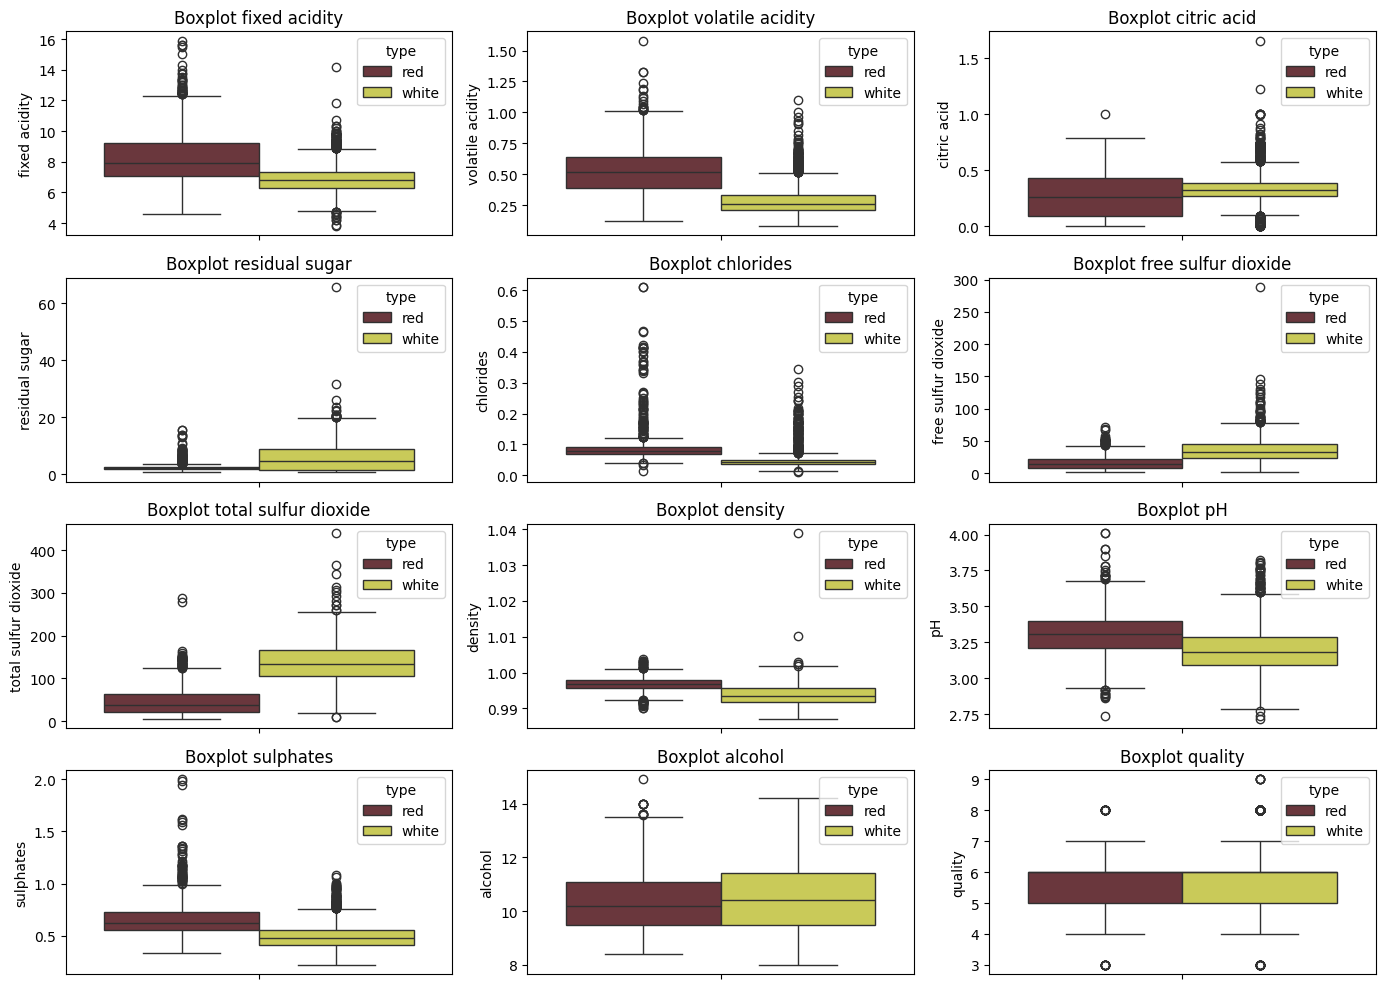

In [13]:
from utils import boxplot_graph_multi_elements, get_numeric_columns
boxplot_graph_multi_elements(df, get_numeric_columns(df))

Se observan outliers en varias columnas de ambos tipos de vinos, pero al tratarse de valores posibles y aceptables, no se modifican. Hay diferencias en casi todas las caracteristicas de vino entre el vino tinto y el vino blanco, exceptuando las columnas de alcohol y calidad

Continuaremos graficando unos histogramas

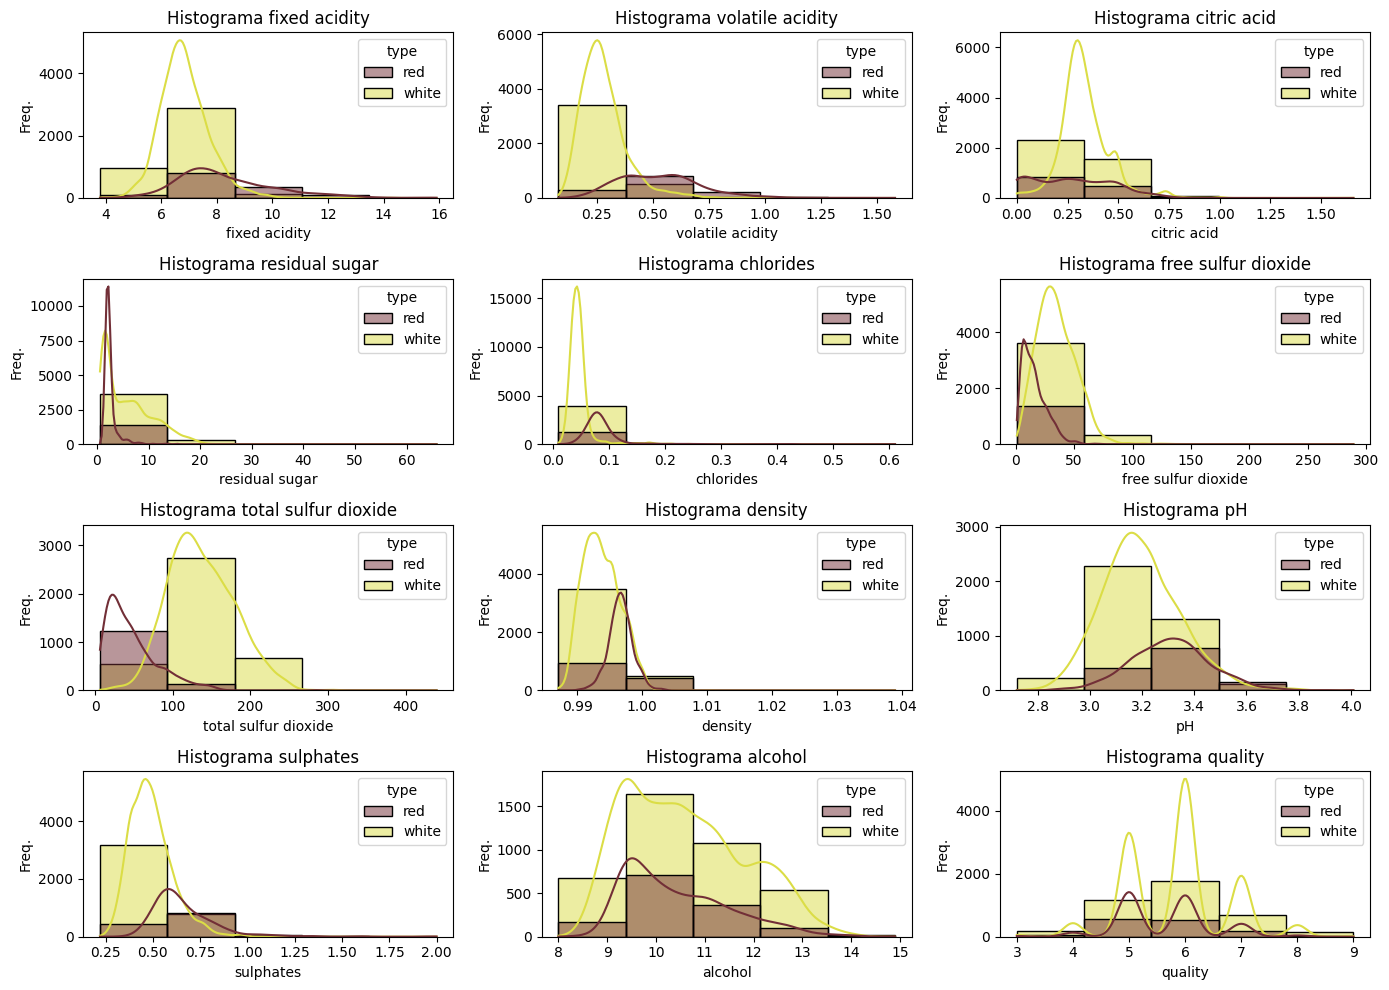

In [14]:
from utils import graph_histogram, get_numeric_columns
graph_histogram(df, get_numeric_columns(df), kde=True)

Se observan desplazamiento a la izquierda de varias caracteristicas, esto es asi para vino y para vino blanco. Solamente la columna posee histograma bastante balanceado.

Para continuar nuestro analisis haremos un histograma de la calidad para observarlo con mas detalle

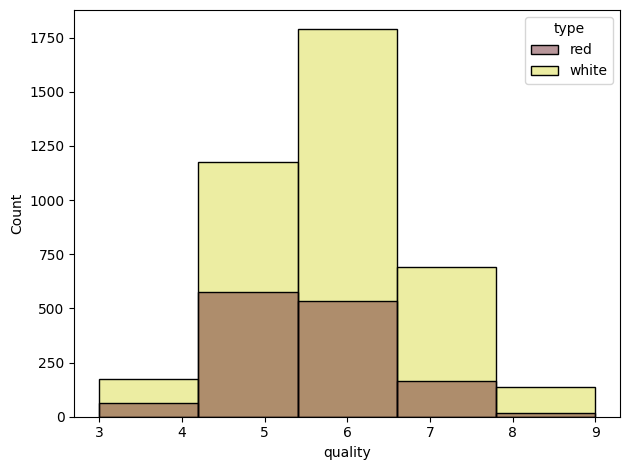

In [15]:
from utils import graph_comparison_histogram
graph_comparison_histogram(df, column='quality')

Observando la distribucion de ambos tipos de vinos, vemos que ambos son bastante cercanos a una distribucion normal

Creamos una columna para clasificar la calidad del vino con una variable categorica mas util. Esta columna categorizara a los vinos entre buenos y malos y se establecera el umbral de 6, en donde menores o iguales a 6 seran considerados malos y superiores a 6 seran considerados buenos.

In [16]:
df['quality_abs'] = ""
df.loc[df['quality'] > 6, 'quality_abs'] = 'good'
df.loc[df['quality'] <= 6, 'quality_abs'] = 'bad'
df["quality"] = df["quality"].astype('category')
df["quality_abs"] = df["quality_abs"].astype('category')

Ahora graficaremos un grafico de barra en donde compararemos la cantidad de vinos malos y vinos buenos para cada tipo de vino

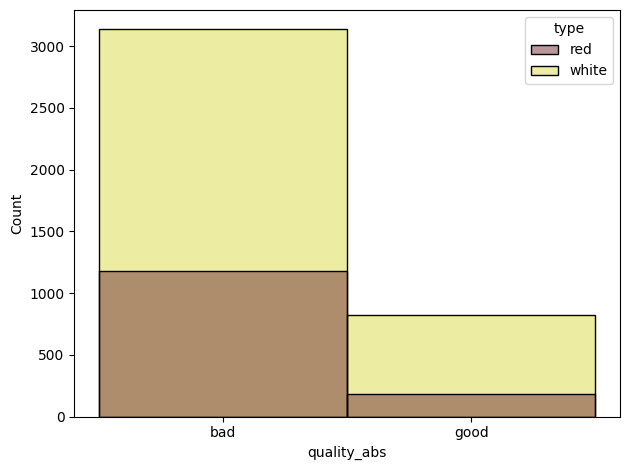

In [17]:
from utils import graph_comparison_bargraph
graph_comparison_bargraph(df, column='quality_abs')

Observamos que existe una gran diferencia entre la cantidad de vinos malos y buenos. Necesitaremos balancear nuestros datos para que el modelo responda adecuadamente. Ya que de otra manera los outliers podrian afectar negativamente a nuestro modelo. 

Generamos algunas graficas adicionales para observar la relacion entre variables.
A continuacion las graficas de dispersion de nuestras variables

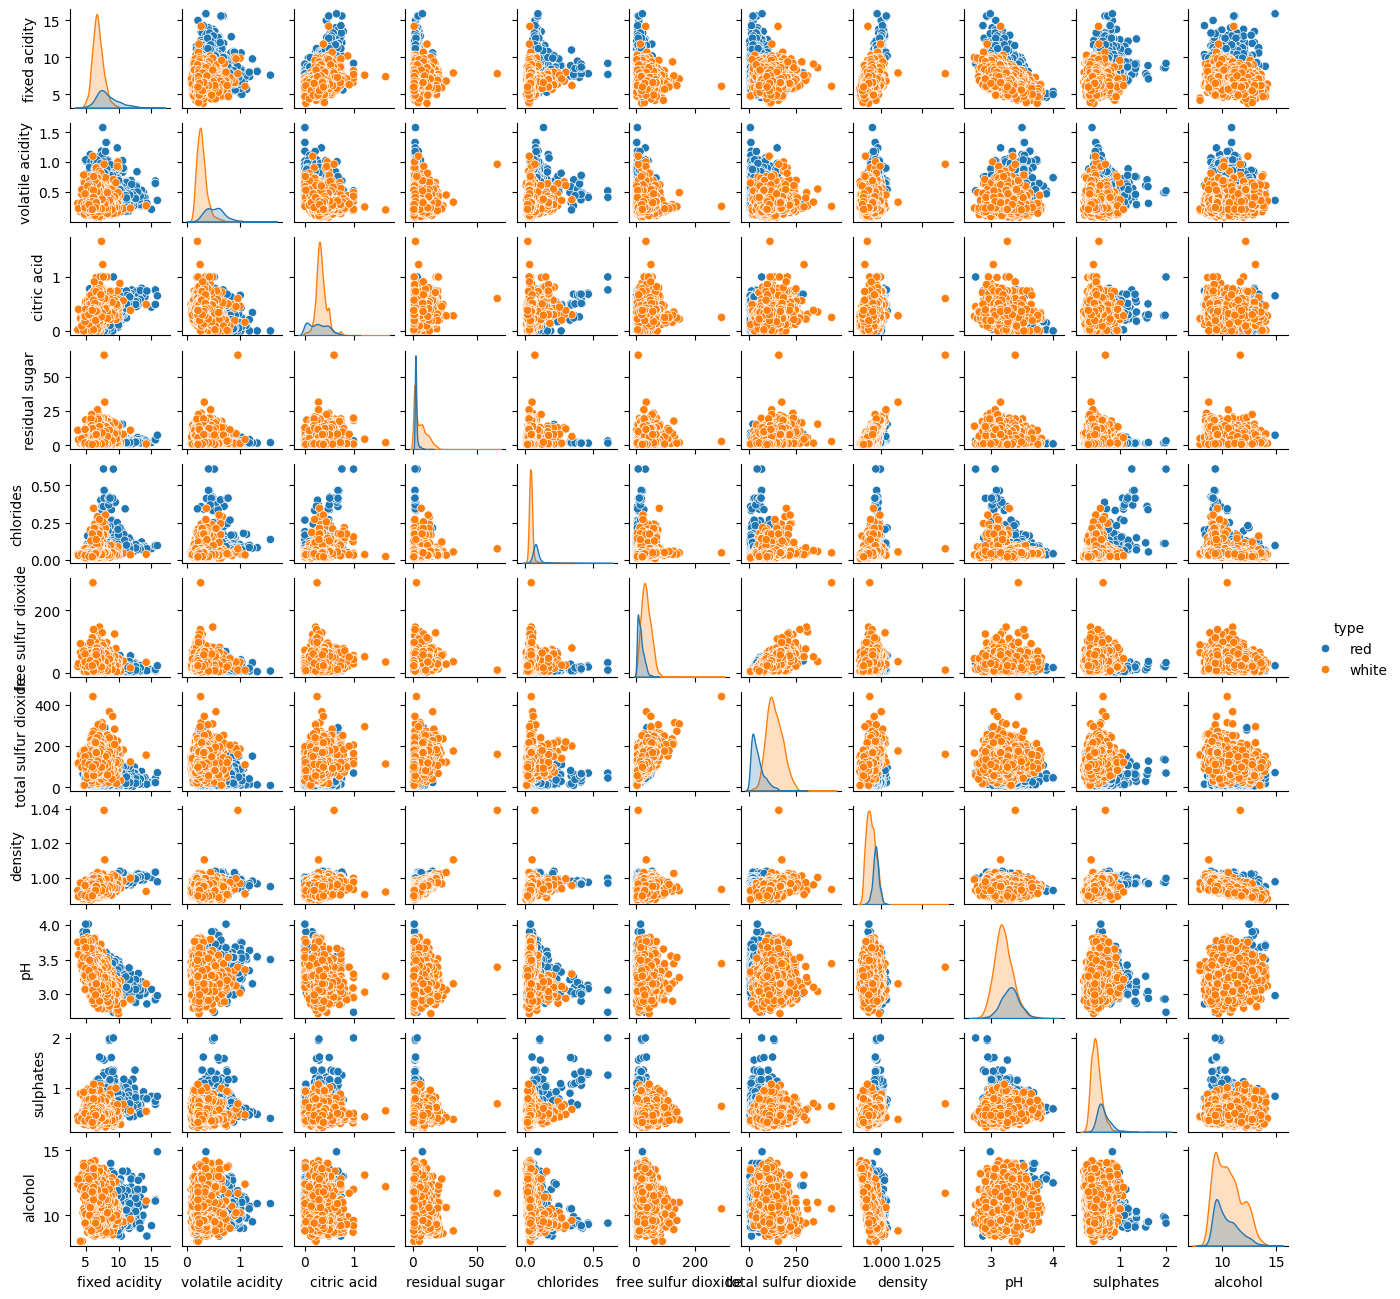

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
palette = sns.color_palette("Spectral")
sns.pairplot(df, hue='type', height=1.2, diag_kind = 'kde')
plt.show()

Continuamos con el mapa de calor de la correlacion entre las caracteristicas de nuestros vinos, contrastaremos los mapas de calor de ambos tipos de vino, para los 3 metodos (Pearson, Spearman y Kendall)

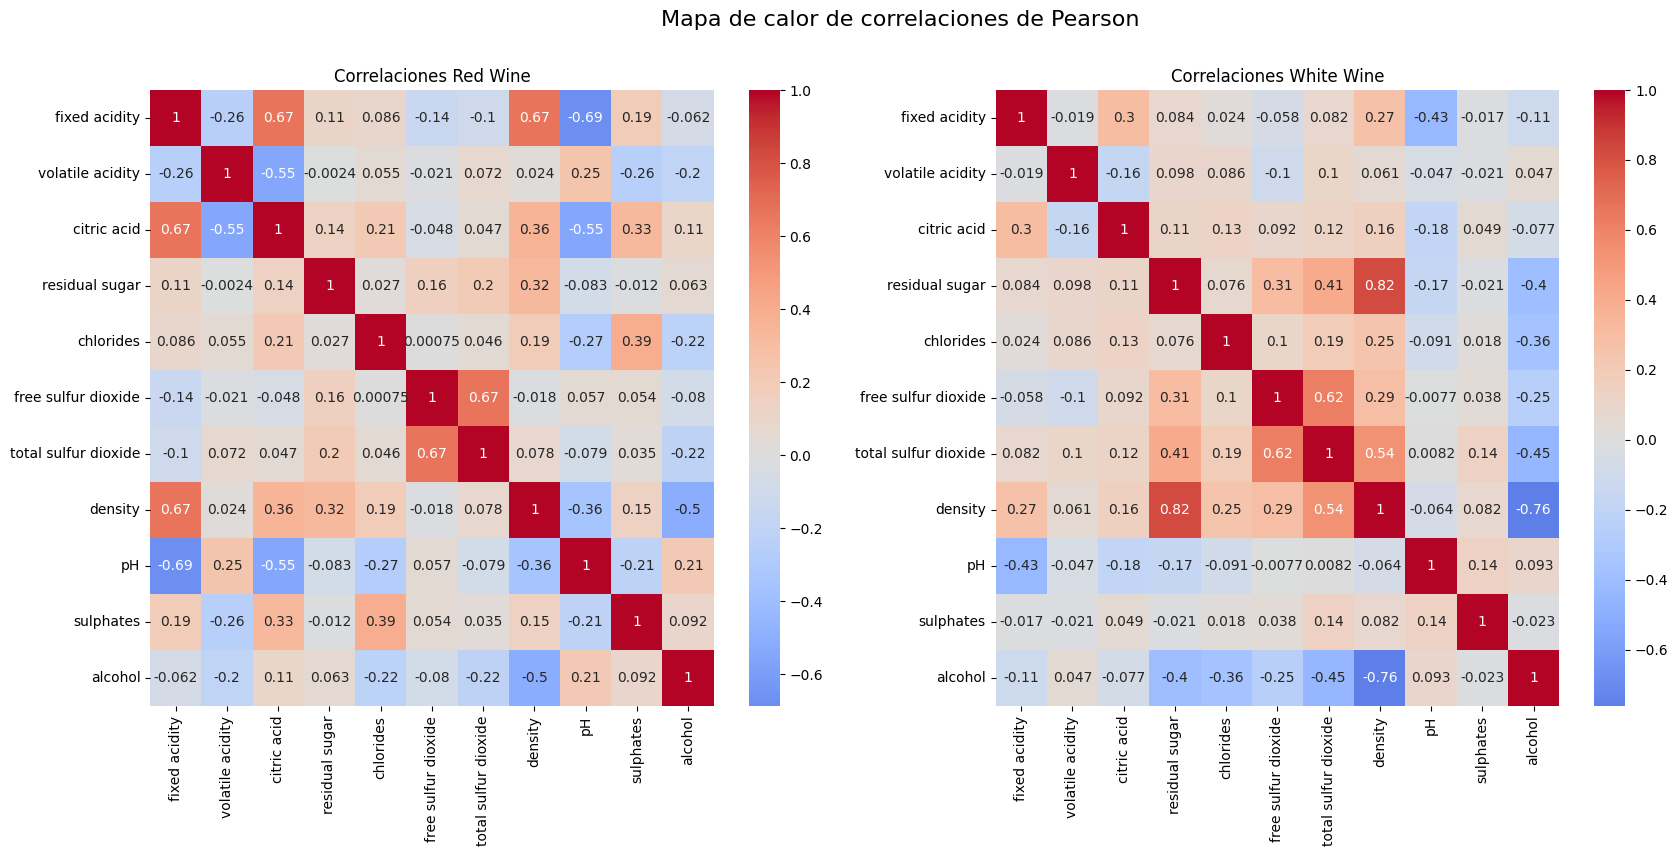

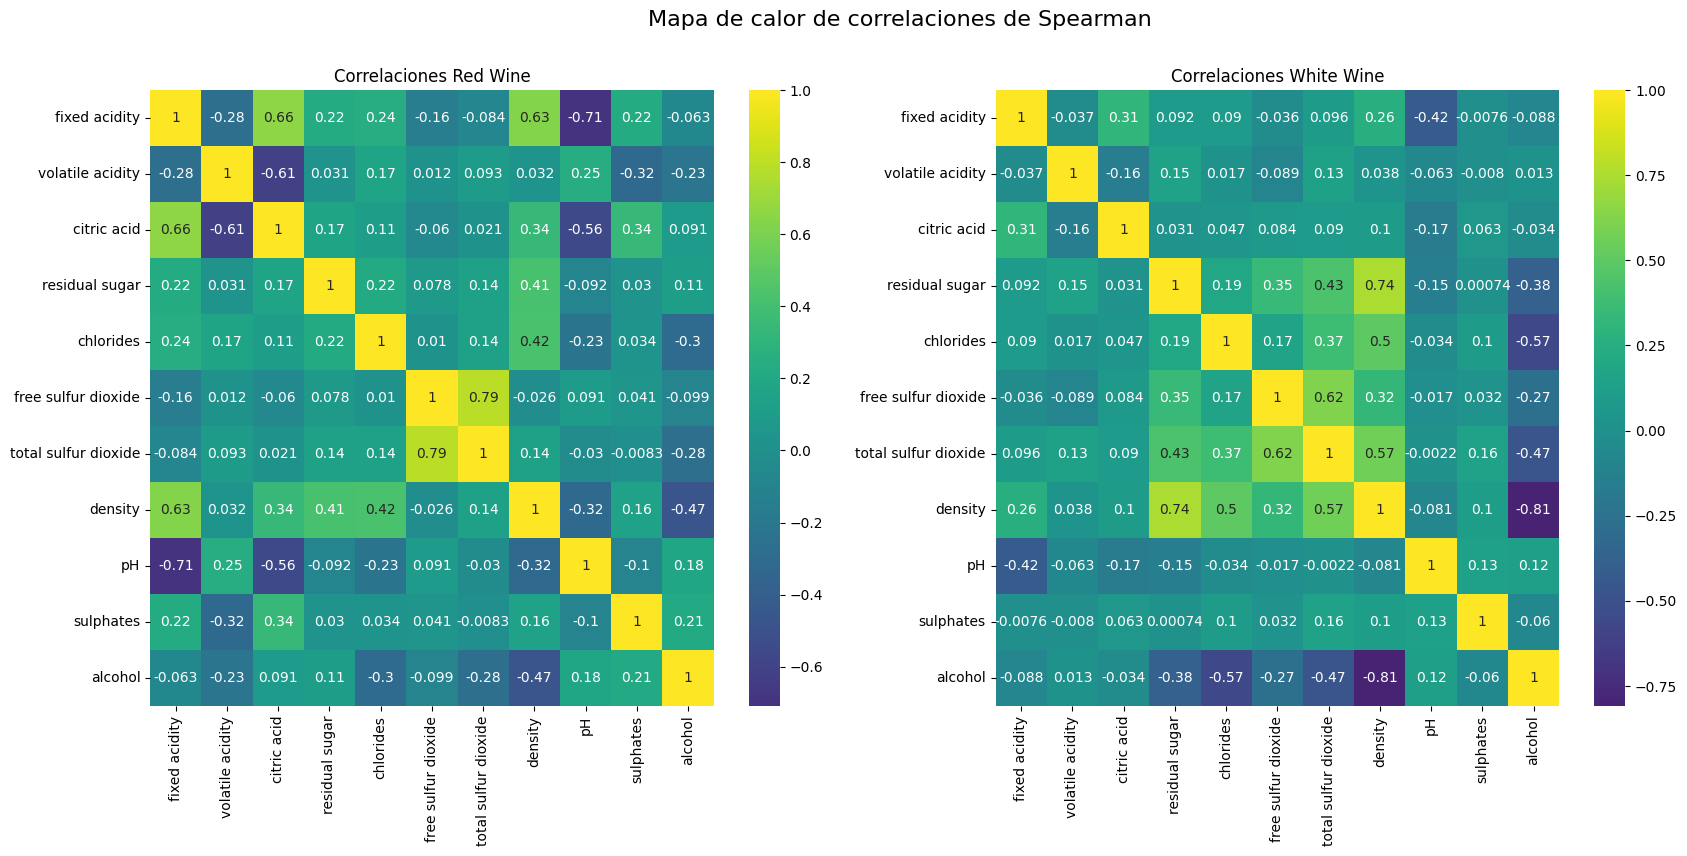

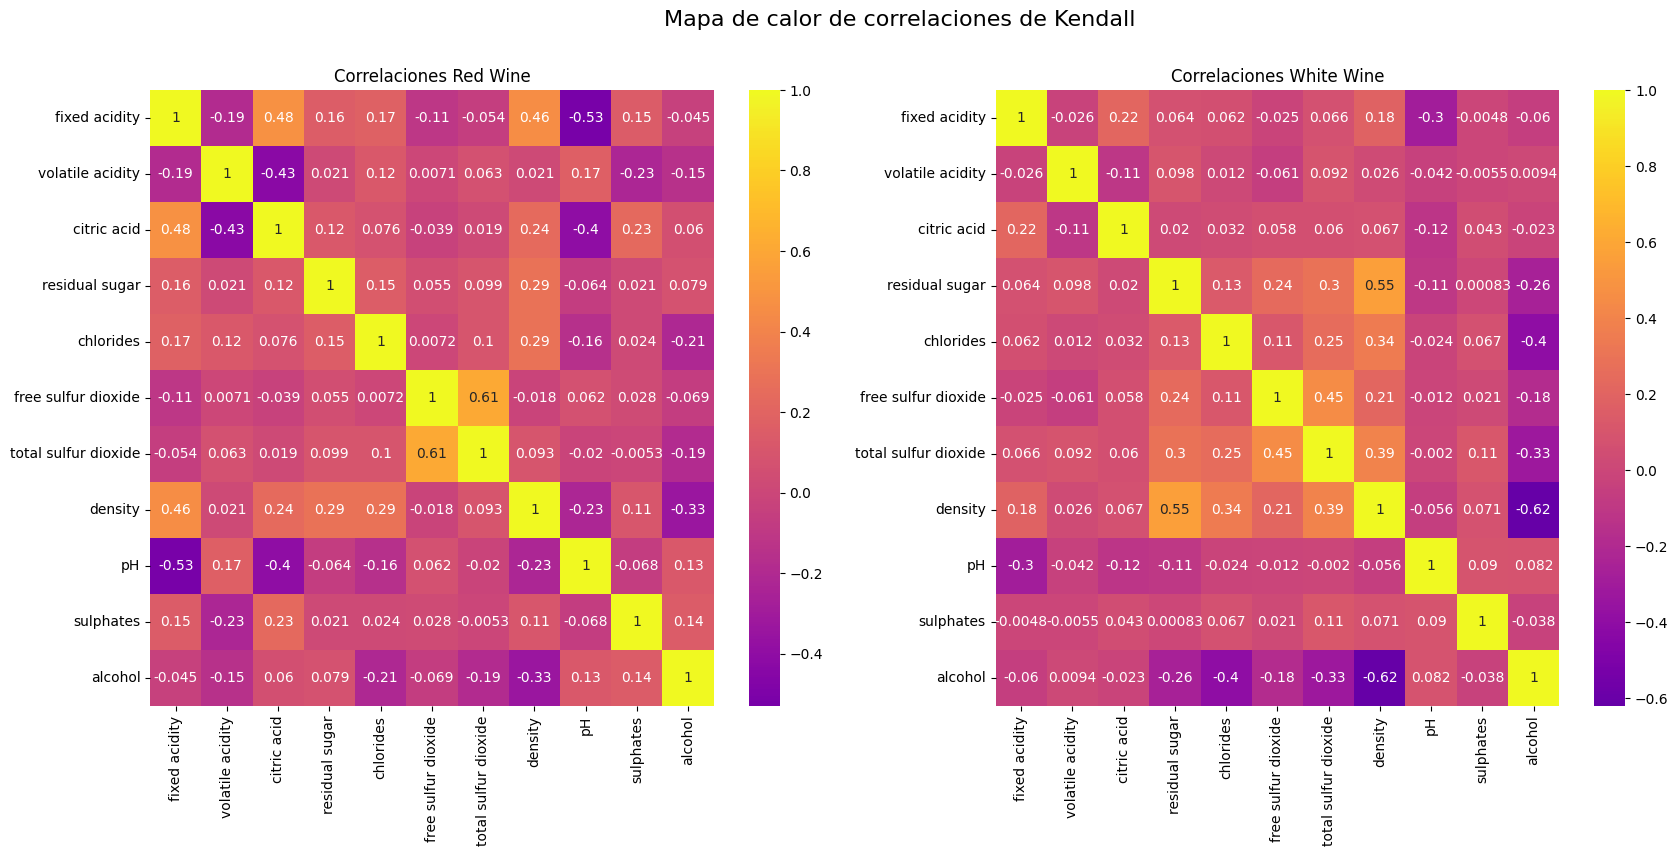

In [19]:
from utils import graph_correlations
# Calcular las correlaciones
df_white = df.query("type == 'white'")
df_red = df.query("type == 'red'")
correlation_matrix_red = df_red[get_numeric_columns(df)].corr(method='pearson')
correlation_matrix_white = df_white[get_numeric_columns(df)].corr(method='pearson')
spearman_corr_red = df_red[get_numeric_columns(df)].corr(method='spearman')
spearman_corr_white = df_white[get_numeric_columns(df)].corr(method='spearman')
kendall_corr_red = df_red[get_numeric_columns(df)].corr(method='kendall')
kendall_corr_white = df_white[get_numeric_columns(df)].corr(method='kendall')
graph_correlations(correlation_matrix_red, correlation_matrix_white, title="Mapa de calor de correlaciones de Pearson", cmap="coolwarm")
graph_correlations(spearman_corr_red, spearman_corr_white, title="Mapa de calor de correlaciones de Spearman", cmap="viridis")
graph_correlations(kendall_corr_red, kendall_corr_white, title="Mapa de calor de correlaciones de Kendall", cmap="plasma")


Segun observamos en los mapas de correlacion de los diferentes vinos, existe similitudes para algunas variables en cuanto a ciertos valores (Por ejemplo: Alcohol-Calidad / Sulfato-Calidad).
Pero en cuanto a otras variables no existe una similitud entre la correlacion de las columnas. Por lo tanto crearemos modelos separados para cada tipo de vino.

### Estadisticas descriptivas

A continuacion se hallan los valores de tendencia central (Media, mediana, moda) y los valores de dispersion (rango, desviacion estandar) todo esto, para cada caracteristica del dataset. Primeramente para el conjunto total de datos y luego para el dataframe por tipo de vino

In [20]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])
# Calcular estadísticas descriptivas
stats = {
    'Media': numerical_features.mean(),
    'Mediana': numerical_features.median(),
    'Moda': numerical_features.mode().iloc[0],  # Toma la primera moda en caso de empate
    'Desviación Estándar': numerical_features.std(),
    'Rango': numerical_features.max() - numerical_features.min()
}
# Convertir las estadísticas a un DataFrame para mejor visualización
stats_df = pd.DataFrame(stats)
# Mostrar las estadísticas descriptivas
print("Estadisticas descriptivas Total dataframe (vino tinto + vino blanco)")
print(stats_df)

Estadisticas descriptivas Total dataframe (vino tinto + vino blanco)
                           Media    Mediana     Moda  Desviación Estándar  \
fixed acidity           7.215179    7.00000    6.800             1.319671   
volatile acidity        0.344130    0.30000    0.280             0.168248   
citric acid             0.318494    0.31000    0.300             0.147157   
residual sugar          5.048477    2.70000    1.600             4.500180   
chlorides               0.056690    0.04700    0.036             0.036863   
free sulfur dioxide    30.036654   28.00000    6.000            17.805045   
total sulfur dioxide  114.109023  116.00000  111.000            56.774223   
density                 0.994535    0.99465    0.992             0.002966   
pH                      3.224664    3.21000    3.160             0.160379   
sulphates               0.533357    0.51000    0.500             0.149743   
alcohol                10.549241   10.40000    9.500             1.185933   

      

In [21]:
numerical_features = df_red.select_dtypes(include=['float64', 'int64'])
# Calcular estadísticas descriptivas
stats = {
    'Media': numerical_features.mean(),
    'Mediana': numerical_features.median(),
    'Moda': numerical_features.mode().iloc[0],  # Toma la primera moda en caso de empate
    'Desviación Estándar': numerical_features.std(),
    'Rango': numerical_features.max() - numerical_features.min()
}
# Convertir las estadísticas a un DataFrame para mejor visualización
stats_df = pd.DataFrame(stats)
# Mostrar las estadísticas descriptivas
print("Estadisticas descriptivas Vino Tinto")
print(stats_df)

Estadisticas descriptivas Vino Tinto
                          Media  Mediana     Moda  Desviación Estándar  \
fixed acidity          8.310596   7.9000   7.2000             1.736990   
volatile acidity       0.529478   0.5200   0.5000             0.183031   
citric acid            0.272333   0.2600   0.0000             0.195537   
residual sugar         2.523400   2.2000   2.0000             1.352314   
chlorides              0.088124   0.0790   0.0800             0.049377   
free sulfur dioxide   15.893304  14.0000   6.0000            10.447270   
total sulfur dioxide  46.825975  38.0000  28.0000            33.408946   
density                0.996709   0.9967   0.9968             0.001869   
pH                     3.309787   3.3100   3.3000             0.155036   
sulphates              0.658705   0.6200   0.5400             0.170667   
alcohol               10.432315  10.2000   9.5000             1.082065   

                          Rango  
fixed acidity          11.30000  
volati

In [22]:
numerical_features = df_white.select_dtypes(include=['float64', 'int64'])
# Calcular estadísticas descriptivas
stats = {
    'Media': numerical_features.mean(),
    'Mediana': numerical_features.median(),
    'Moda': numerical_features.mode().iloc[0],  # Toma la primera moda en caso de empate
    'Desviación Estándar': numerical_features.std(),
    'Rango': numerical_features.max() - numerical_features.min()
}
# Convertir las estadísticas a un DataFrame para mejor visualización
stats_df = pd.DataFrame(stats)
# Mostrar las estadísticas descriptivas
print("Estadisticas descriptivas Vino Blanco")
print(stats_df)

Estadisticas descriptivas Vino Blanco
                           Media   Mediana     Moda  Desviación Estándar  \
fixed acidity           6.839346    6.8000    6.800             0.866860   
volatile acidity        0.280538    0.2600    0.280             0.103437   
citric acid             0.334332    0.3200    0.300             0.122446   
residual sugar          5.914819    4.7000    1.200             4.861646   
chlorides               0.045905    0.0420    0.036             0.023103   
free sulfur dioxide    34.889169   33.0000   29.000            17.210021   
total sulfur dioxide  137.193512  133.0000  111.000            43.129065   
density                 0.993790    0.9935    0.992             0.002905   
pH                      3.195458    3.1800    3.160             0.151546   
sulphates               0.490351    0.4800    0.500             0.113523   
alcohol                10.589358   10.4000    9.500             1.217076   

                          Rango  
fixed acidity  

Las caracteristicas descriptivas nos muestran como se comportan las caracteristicas de nuestro dataset, en la misma vemos como la columna "chlorides" posee valores muy pequenhos y en cambio la columna "total sulfur dioxide" posee valores muy elevados. Tambien vemos como el tipo de vino afecta a las estadisticas mencionadas

## Implementacion de modelos

### Preprocesamiento de datos

Trabajaremos con ambos tipos de vinos por separado, ya que las caracteristicas de calidad de ambos tipos de vinos difieren, como se pudo observar mas arriba.

Inicialmente balancearemos el datagrame, ya que como mencionamos mas arriba, existe una gran diferencia en la cantidad de vinos malos y vinos buenos, por lo tanto haremos un Oversampling.
A continuacion agrupamos por calidad y enumeramos.


In [23]:
df_red.groupby("quality_abs", observed=False).count()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality_abs                                                                 
bad                   1175              1175         1175            1175   
good                   184               184          184             184   

             chlorides  free sulfur dioxide  total sulfur dioxide  density  \
quality_abs                                                                  
bad               1175                 1175                  1175     1175   
good               184                  184                   184      184   

               pH  sulphates  alcohol  quality  type  
quality_abs                                           
bad          1175       1175     1175     1175  1175  
good          184        184      184      184   184

Almacenamos de acuerdo a la calidad de vino tinto.

In [24]:
good_red = df_red[df_red.quality_abs=='good']
bad_red = df_red[df_red.quality_abs=='bad']
    

Para el vino tinto. Utilizaremos el conteo 1175 como limite para completar los datos por oversampling, ya que es el de mayor frecuencia, para las clases de quality_abs. Antes de continuar, haremos lo mismo para el vino blanco

In [25]:
df_white.groupby("quality_abs",observed=False).count()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality_abs                                                                 
bad                   3136              3136         3136            3136   
good                   825               825          825             825   

             chlorides  free sulfur dioxide  total sulfur dioxide  density  \
quality_abs                                                                  
bad               3136                 3136                  3136     3136   
good               825                  825                   825      825   

               pH  sulphates  alcohol  quality  type  
quality_abs                                           
bad          3136       3136     3136     3136  3136  
good          825        825      825      825   825

In [26]:
good_white = df_white[df_white.quality_abs=='good']
bad_white = df_white[df_white.quality_abs=='bad']

En el caso del vino blanco tenemos categorizado por bueno y malo, por lo tanto marginamos en esos 2 valores. Para este tipo de vino utilizaremos el conteo de 3136, que corresponde a los vinos malos.

A continuacion haremos el resampleado para balancear nuestros datos y evitar influencias debido a la diferencia entre la cantidad de datos de vinos malos y buenos, luego combinaremos nuestros datos. 

Iniciamos con vino tinto y luego para vino blanco

In [27]:
from sklearn.utils import resample

# Resampleamos para arriba las clases que están en la minoría. Vino tinto
good_red_upsampled = resample(good_red, replace=True, n_samples=1175, random_state=12) 

# Resampleamos para arriba las clases que están en la minoría. Vino blanco
good_white_upsampled = resample(good_white, replace=True, n_samples=3136, random_state=12) 


Ahora seguimos con la combinacion de clases mayoritarias submuestreadas con las clases minoritarias sobremuestreadas. Para ambos tipos de vinos.

In [28]:
# Combinamos nuestra  clase mayoritaria submuestreada con la clase minoritaria sobremuestreada. Para vino tinto
balanced_df_red = pd.concat([good_red_upsampled, bad_red]).reset_index(drop=True)
# Combinamos nuestra  clase mayoritaria submuestreada con la clase minoritaria sobremuestreada. Para vino blanco
balanced_df_white = pd.concat([good_white_upsampled, bad_white]).reset_index(drop=True)
# Display new class counts
print("Vino tinto")
print(balanced_df_red.quality_abs.value_counts())
print("\nVino blanco")
print(balanced_df_white.quality_abs.value_counts())

Vino tinto
quality_abs
bad     1175
good    1175
Name: count, dtype: int64

Vino blanco
quality_abs
bad     3136
good    3136
Name: count, dtype: int64


Ahora obtenemos las columnas numericas para la prediccion.

In [29]:
numeric_columns= get_numeric_columns(df)
numeric_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

No utilizaremos la columna quality, ya que es la columna que es categorica

In [30]:
numeric_columns_predict = [
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
]

output = "quality_abs"

X_red = balanced_df_red[[*numeric_columns_predict]]
y_red = balanced_df_red[output]

X_white = balanced_df_white[[*numeric_columns_predict]]
y_white = balanced_df_white[output]

Tenemos todos los datos listos para el entrenamiento del modelo. A continuacion realizamos el escalamiento de caracteristicas para ambos tipos de vinos. Utilizaremos el 30% de nuestros datos para las pruebas y 70% para el entrenamiento.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(
    X_red,
    y_red,
    test_size=0.3,
    random_state=0,
)

X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(
    X_white,
    y_white,
    test_size=0.3,
    random_state=0,
) 

scaler = RobustScaler()
X_train_red = scaler.fit_transform(X_train_red)
X_test_red = scaler.transform(X_test_red)
X_train_white = scaler.fit_transform(X_train_white)
X_test_white = scaler.transform(X_test_white)

Utilizamos el RobustScaler ya que en las graficas se pudieron observar gran numero de outliers.
Con las caracteristicas escaladas, podemos proceder a entrenar los modelos de clasificacion.

### Modelos de clasificacion

#### Entrenamiento de modelos de clasificacion

##### Regresion Logistica

Definimos nuestro modelo de Regresion logistica, al utilizar el RobustScaler, con la configuracion actual, nos pide que aumentemos el parametro max_iter o que reescalemos la muestra. Por lo tanto se utiliza 150 como valor de max_iter

Iniciamos con el modelo para vino tinto

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# Crear el modelo de Regresión Logística con hiperparámetros específicos
lr_red = LogisticRegression(
    penalty='l2',           # Tipo de regularización L2 (Ridge)
    C=1.0,                   # Inverso de la fuerza de regularización
    solver='lbfgs',          # Algoritmo para la optimización
    max_iter=100,            # Número máximo de iteraciones
    tol=1e-4,                # Tolerancia para el criterio de parada
    random_state=0,         # Semilla para la reproducibilidad
)         
# Entrenar el modelo
lr_red.fit(X_train_red, y_train_red)

LogisticRegression(random_state=0)

Ahora creamos el modelo para vino blanco

In [33]:
lr_white = LogisticRegression(
    penalty='l2',           # Tipo de regularización L2 (Ridge)
    C=1.0,                   # Inverso de la fuerza de regularización
    solver='lbfgs',          # Algoritmo para la optimización
    max_iter=150,            # Número máximo de iteraciones
    tol=1e-4,                # Tolerancia para el criterio de parada
    random_state=42 # Semilla para la reproducibilidad
)  
lr_white.fit(X_train_white, y_train_white)

LogisticRegression(max_iter=150, random_state=42)

Ahora que ya tenemos los modelos para ambos tipos de vinos con Regresion Logistica. Crearemos otros modelos de KNN para ambos tipos de vinos

##### K-Nearest Neighbors KNN

Creacion de modelo KNN para vino tinto

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Probar diferentes valores de K
k_values = list(range(1, 21))
mse_scores_red = []

for k in k_values:
    knn_red = KNeighborsClassifier(n_neighbors=k, weights="distance")
    scores = cross_val_score(knn_red, X_train_red, y_train_red, cv=5)
    mse_scores_red.append(scores.mean())

# Seleccionar el K con el menor MSE
best_k_red = k_values[mse_scores_red.index(max(mse_scores_red))]
print(f'Mejor valor de K para modelo de vino tinto: {best_k_red}')

Mejor valor de K para modelo de vino tinto: 1


Continuamos con el modelo de vino blanco

In [35]:
# Probar diferentes valores de K
k_values = list(range(1, 21))
mse_scores_white = []

for k in k_values:
    knn_white = KNeighborsClassifier(n_neighbors=k, weights="distance")
    scores = cross_val_score(knn_white, X_train_white, y_train_white, cv=5)
    mse_scores_white.append(scores.mean())

# Seleccionar el K con el menor MSE
best_k_white = k_values[mse_scores_white.index(max(mse_scores_white))]
print(f'Mejor valor de K para modelo de vino blanco: {best_k_white}')

Mejor valor de K para modelo de vino blanco: 1


Enrenaremos el modelo KNN para ambos tipos de vinos. Primeramente con el vino tinto y luego con el vino blanco

In [36]:
# Entrenar el modelo KNN Vino Tinto
knn_red = KNeighborsClassifier(n_neighbors=best_k_red)
knn_red.fit(X_train_red, y_train_red)
knn_red.fit(X_train_red, y_train_red)

KNeighborsClassifier(n_neighbors=1)

In [37]:
# Entrenar el modelo KNN Vino BLanco
knn_white = KNeighborsClassifier(n_neighbors=best_k_white)
knn_white.fit(X_train_white, y_train_white)
knn_white.fit(X_train_white, y_train_white)

KNeighborsClassifier(n_neighbors=1)

### Evaluacion de modelos

#### Evaluacion Modelo KNN

In [38]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)

y_pred_knn_red = knn_red.predict(X_test_red)

# Evaluar el modelo
accuracy_knn_red = accuracy_score(y_test_red, y_pred_knn_red)

print(f'Exactitud:accuracy_knn Vino Tinto {accuracy_knn_red}')
classification_report_knn_red = classification_report(y_test_red, y_pred_knn_red)
print('Informe de Clasificación:')
print(classification_report_knn_red)

# Matriz de Confusión
conf_matrix_knn_red = confusion_matrix(y_test_red, y_pred_knn_red)
print('Matriz de Confusión KNN (Vino tinto):')
print(conf_matrix_knn_red)

Exactitud:accuracy_knn Vino Tinto 0.9460992907801419
Informe de Clasificación:
              precision    recall  f1-score   support

         bad       0.98      0.91      0.94       354
        good       0.91      0.99      0.95       351

    accuracy                           0.95       705
   macro avg       0.95      0.95      0.95       705
weighted avg       0.95      0.95      0.95       705

Matriz de Confusión KNN (Vino tinto):
[[321  33]
 [  5 346]]


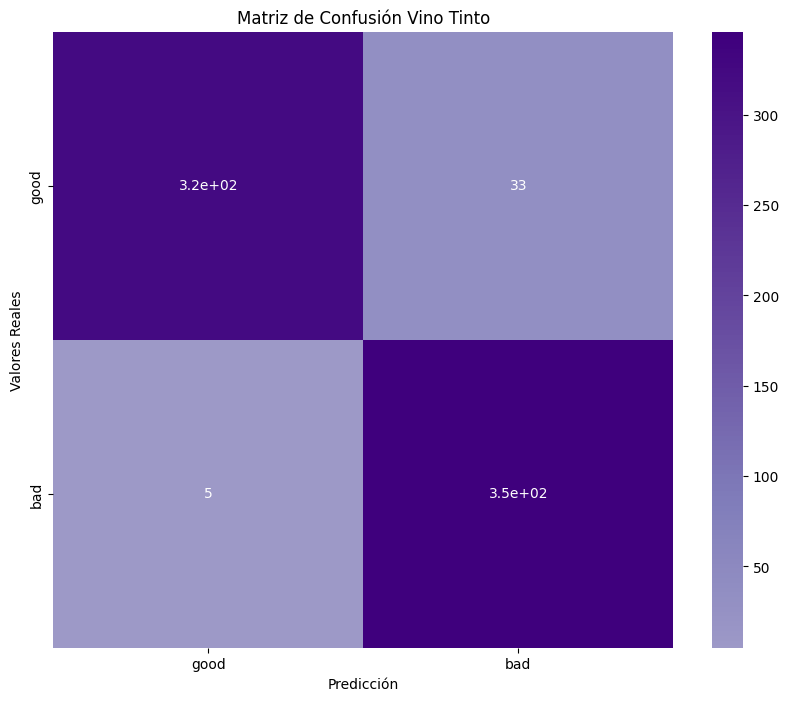

In [39]:
from matplotlib import pyplot as plt
import seaborn as sns

_, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_knn_red,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax1,
)

ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks(), labels=["good" , "bad"])
ax1.set_yticks(ticks=ax1.get_yticks(), labels=["good", "bad"])
ax1.set_title('KNN')
plt.title("Matriz de Confusión Vino Tinto")
plt.show()

In [40]:
y_pred_knn_white = knn_white.predict(X_test_white)

# Evaluar el modelo
accuracy_knn_white = accuracy_score(y_test_white, y_pred_knn_white)

print(f'Exactitud:accuracy_knn (Vino Blanco) {accuracy_knn_white}')
classification_report_knn_white = classification_report(y_test_white, y_pred_knn_white)
print('Informe de Clasificación:')
print(classification_report_knn_white)

# Matriz de Confusión
conf_matrix_knn_white = confusion_matrix(y_test_white, y_pred_knn_white)
print('Matriz de Confusión KNN (Vino Blanco):')
print(conf_matrix_knn_white)

Exactitud:accuracy_knn (Vino Blanco) 0.89798087141339
Informe de Clasificación:
              precision    recall  f1-score   support

         bad       0.94      0.84      0.89       926
        good       0.86      0.95      0.90       956

    accuracy                           0.90      1882
   macro avg       0.90      0.90      0.90      1882
weighted avg       0.90      0.90      0.90      1882

Matriz de Confusión KNN (Vino Blanco):
[[782 144]
 [ 48 908]]


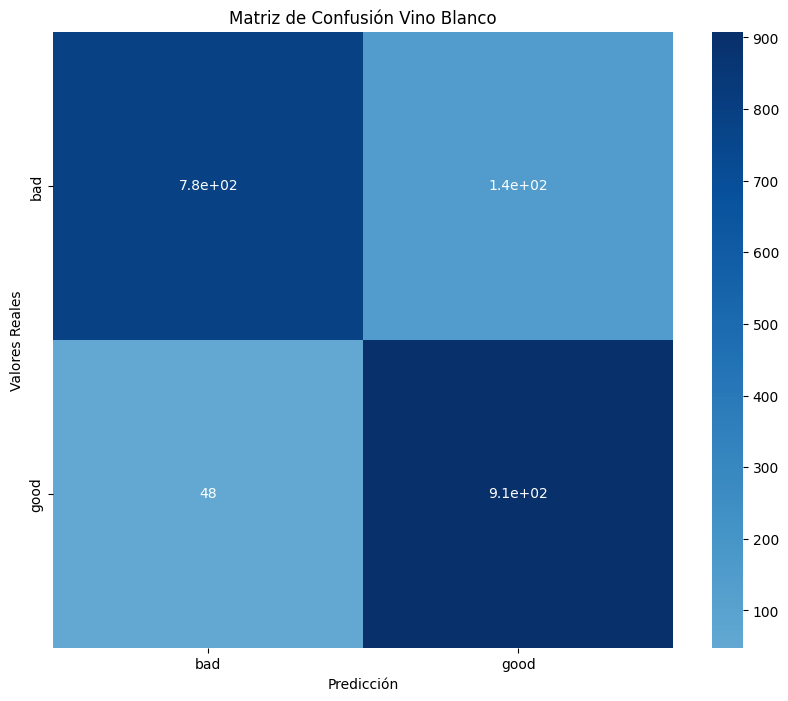

In [41]:
_, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_knn_white,
    annot=True,
    cmap='Blues',
    center=0,
    ax=ax1,
)

ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks(), labels=["bad","good"])
ax1.set_yticks(ticks=ax1.get_yticks(), labels=["bad", "good"])
ax1.set_title('KNN')
plt.title("Matriz de Confusión Vino Blanco")
plt.show()

#### Evaluacion Modelo de regresion Logistica

In [42]:
# Realizar predicciones
y_pred_lr_red = lr_red.predict(X_test_red)

# Evaluar el modelo
accuracy_lr_cv_red = accuracy_score(y_test_red, y_pred_lr_red)

print(f'Exactitud:accuracy_lr_cv {accuracy_lr_cv_red}')
classification_report_lr_cv_red = classification_report(y_test_red, y_pred_lr_red)
print('Informe de Clasificación:')
print(classification_report_lr_cv_red)

# Matriz de Confusión
conf_matrix_lr_cv_red = confusion_matrix(y_test_red, y_pred_lr_red)
print('Matriz de Confusión Logistic Regression:')
print(conf_matrix_lr_cv_red)

Exactitud:accuracy_lr_cv 0.8184397163120567
Informe de Clasificación:
              precision    recall  f1-score   support

         bad       0.84      0.78      0.81       354
        good       0.80      0.85      0.82       351

    accuracy                           0.82       705
   macro avg       0.82      0.82      0.82       705
weighted avg       0.82      0.82      0.82       705

Matriz de Confusión Logistic Regression:
[[277  77]
 [ 51 300]]


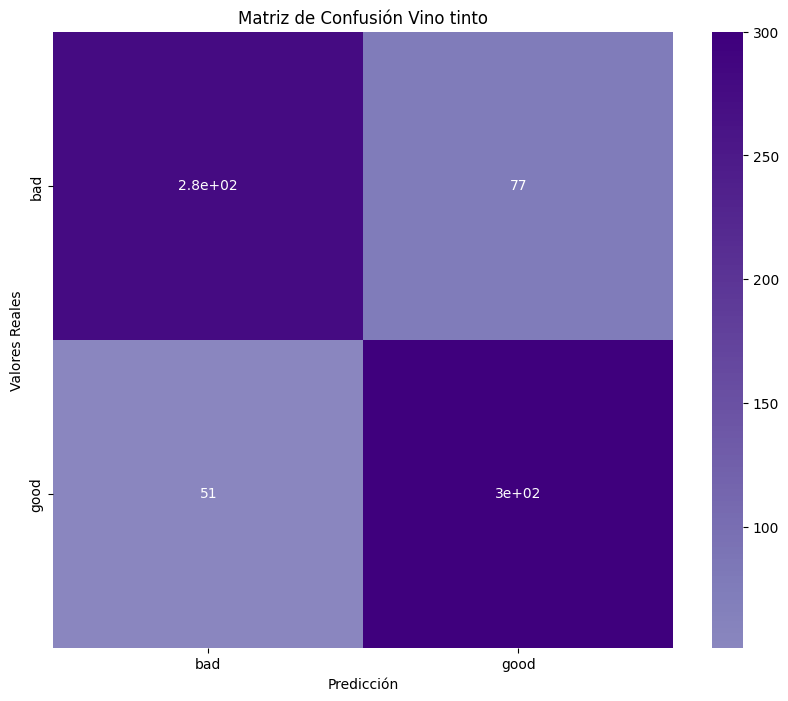

In [43]:
from matplotlib import pyplot as plt
import seaborn as sns

_, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_lr_cv_red,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax2,
)

ax2.set_xlabel("Predicción")
ax2.set_ylabel("Valores Reales")
ax2.set_xticks(ticks=ax2.get_xticks(), labels=["bad", "good"])
ax2.set_yticks(ticks=ax2.get_yticks(), labels=["bad", "good"])
ax2.set_title('Logistic Regression')
plt.title("Matriz de Confusión Vino tinto")
plt.show()

In [44]:
# Realizar predicciones
y_pred_lr_white = lr_white.predict(X_test_white)

# Evaluar el modelo
accuracy_lr_cv_white = accuracy_score(y_test_white, y_pred_lr_white)

print(f'Exactitud:accuracy_lr_cv {accuracy_lr_cv_white}')
classification_report_lr_cv_white = classification_report(y_test_white, y_pred_lr_white)
print('Informe de Clasificación:')
print(classification_report_lr_cv_white)

# Matriz de Confusión
conf_matrix_lr_cv_white = confusion_matrix(y_test_white, y_pred_lr_white)
print('Matriz de Confusión Logistic Regression:')
print(conf_matrix_lr_cv_white)

Exactitud:accuracy_lr_cv 0.7646121147715197
Informe de Clasificación:
              precision    recall  f1-score   support

         bad       0.78      0.73      0.75       926
        good       0.75      0.80      0.78       956

    accuracy                           0.76      1882
   macro avg       0.77      0.76      0.76      1882
weighted avg       0.77      0.76      0.76      1882

Matriz de Confusión Logistic Regression:
[[672 254]
 [189 767]]


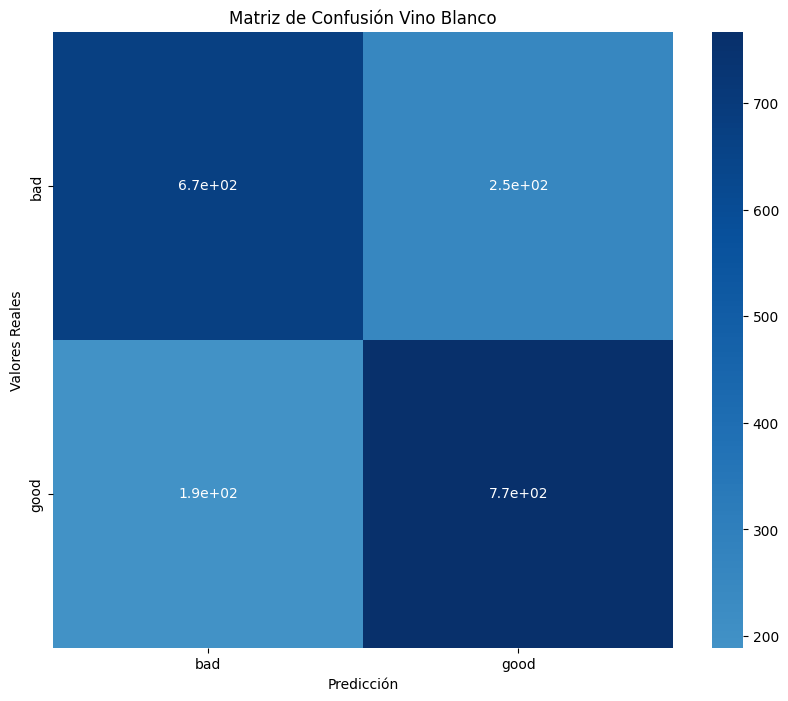

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns

_, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_lr_cv_white,
    annot=True,
    cmap='Blues',
    center=0,
    ax=ax2,
)

ax2.set_xlabel("Predicción")
ax2.set_ylabel("Valores Reales")
ax2.set_xticks(ticks=ax2.get_xticks(), labels=["bad", "good"])
ax2.set_yticks(ticks=ax2.get_yticks(), labels=["bad", "good"])
ax2.set_title('Logistic Regression')
plt.title("Matriz de Confusión Vino Blanco")
plt.show()

Se observa que en el caso del vino blanco, la matriz confusion evidencia una respuesta no adecuada. Mas adelante compararemos con los demas mapas de calor para profundizar en este tema.

### Comparacion de rendimiento

#### Matriz confusion de los modelos

Comparamos las matrices confusion para evaluar el desempenho de los modelos para cada tipo de vino y para cada modelo (KNN Regresion logistica)

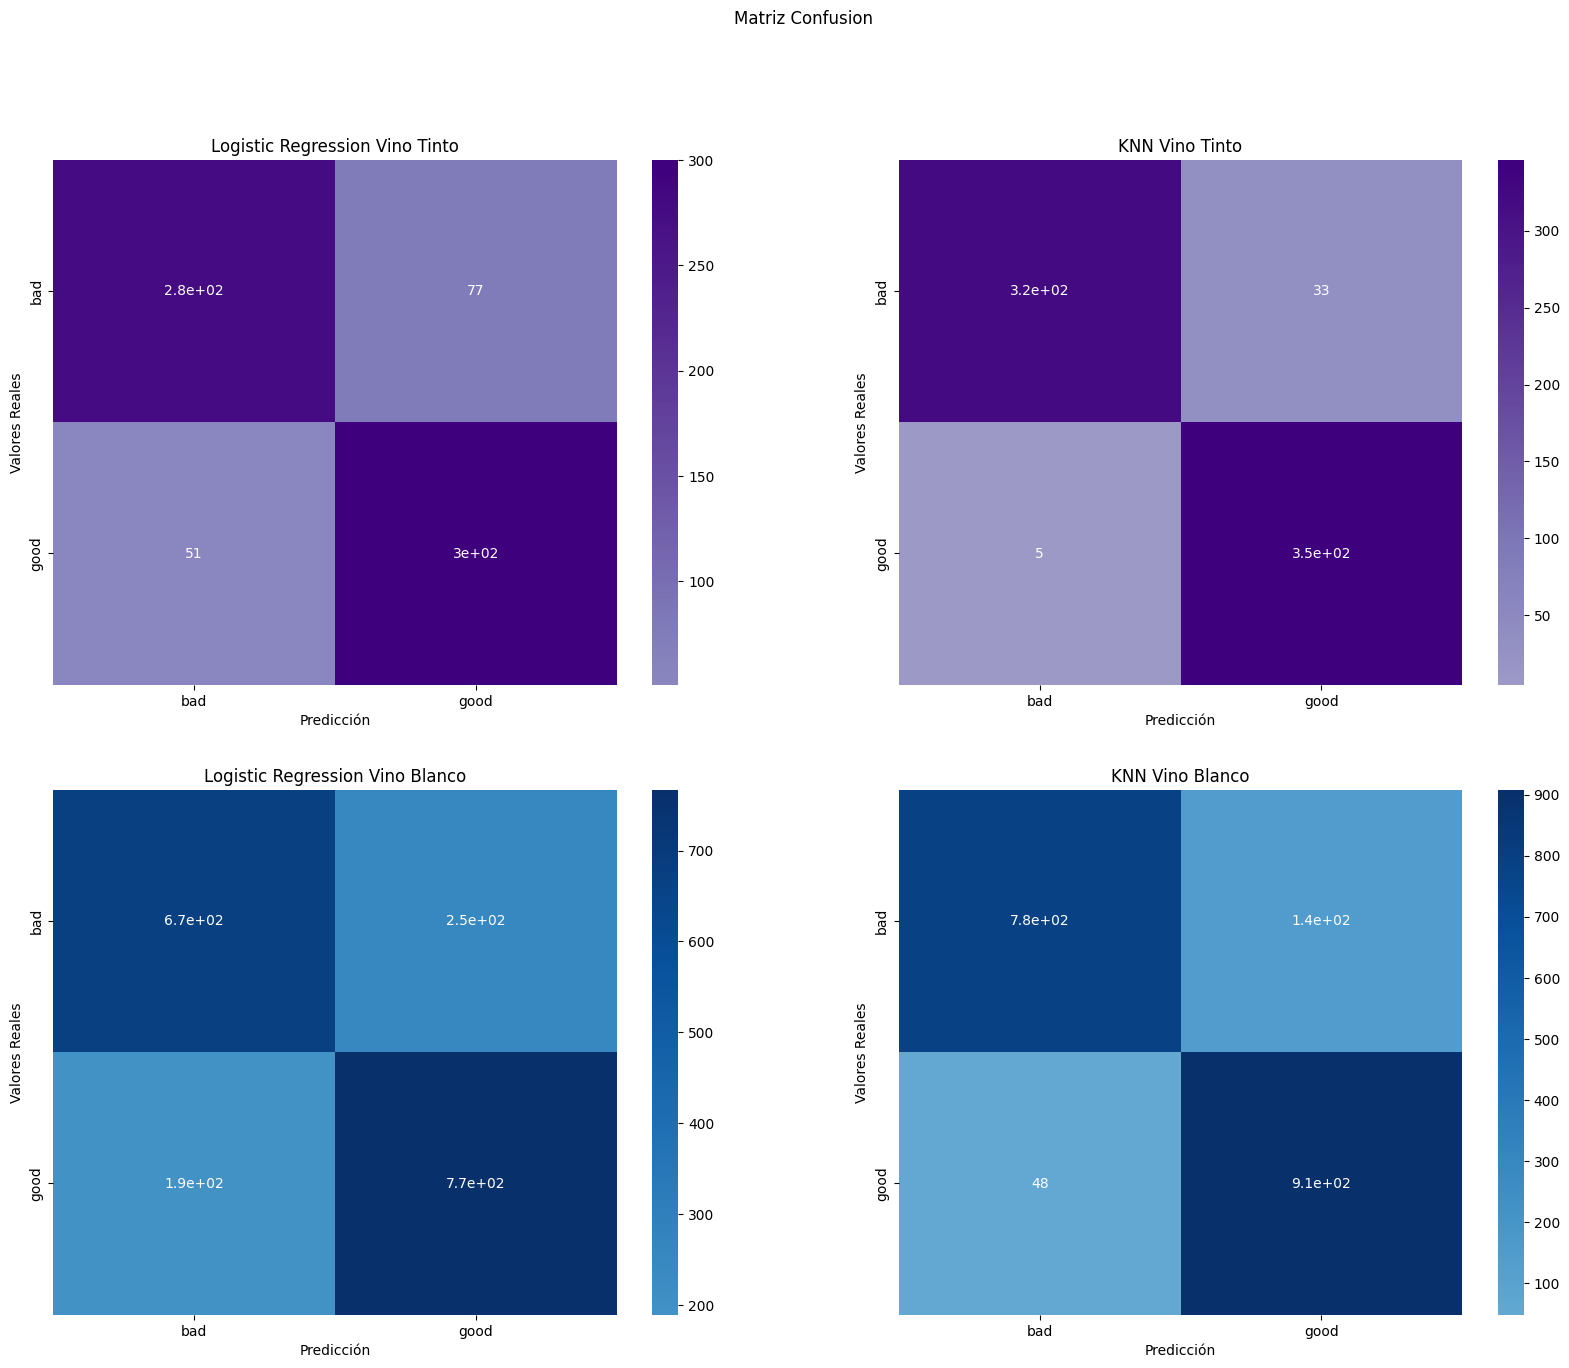

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns

_, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
ax1, ax2, ax3, ax4= axes.flatten()
sns.heatmap(
    conf_matrix_lr_cv_red,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax1,
)
sns.heatmap(
    conf_matrix_knn_red,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax2,
)
sns.heatmap(
    conf_matrix_lr_cv_white,
    annot=True,
    cmap='Blues',
    center=0,
    ax=ax3,
)
sns.heatmap(
    conf_matrix_knn_white,
    annot=True,
    cmap='Blues',
    center=0,
    ax=ax4,
)

ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks(), labels=["bad", "good"])
ax1.set_yticks(ticks=ax1.get_yticks(), labels=["bad", "good"])
ax1.set_title('Logistic Regression Vino Tinto')
ax2.set_xlabel("Predicción")
ax2.set_ylabel("Valores Reales")
ax2.set_xticks(ticks=ax2.get_xticks(), labels=["bad", "good"])
ax2.set_yticks(ticks=ax2.get_yticks(), labels=["bad", "good"])
ax2.set_title('KNN Vino Tinto')
ax3.set_xlabel("Predicción")
ax3.set_ylabel("Valores Reales")
ax3.set_xticks(ticks=ax3.get_xticks(), labels=["bad", "good"])
ax3.set_yticks(ticks=ax3.get_yticks(), labels=["bad", "good"])
ax3.set_title('Logistic Regression Vino Blanco')
ax4.set_xlabel("Predicción")
ax4.set_ylabel("Valores Reales")
ax4.set_xticks(ticks=ax4.get_xticks(), labels=["bad", "good"])
ax4.set_yticks(ticks=ax4.get_yticks(), labels=["bad", "good"])
ax4.set_title('KNN Vino Blanco')
plt.suptitle('Matriz Confusion')
plt.show()

* Vino tinto
En el caso del vino tinto no existe una diferencia muy notable entre ambos, a simple viste se percibe un mejor rendimiento del modelo KNN, pero como veremos en el caso del vino tinto no es tan evidente.

* Vino Blanco
Observamos ambas matrices confusiones y vemos que para el caso de vinos blancos, existe un peor rendimiento. 
Utilizando la Regresion logistica con el vino blanco obtenemos una muy mala respuesta. Lo que sugiere que el metodo no es el adecuado.
En el caso de KNN para vino blanco, se observa una mejor respuesta, por lo anto el metodo de K-Nearest Neighborghs es mejor.



#### Evaluacion utilizando accuracy, precision, recall y F1-score

In [47]:
print('Accuracy Regresion Logistica Vino Tinto: {}'.format(accuracy_lr_cv_red)) 
print('Accuracy Regresion Logistica Vino Blanco: {}'.format(accuracy_lr_cv_white)) 
print('Accuracy KNN Vino Tinto: {}'.format(accuracy_knn_red))
print('Accuracy KNN Vino Blanco: {} \n'.format(accuracy_knn_white))
# El siguiente fragmento de codigo fue obtenido a traves de ChatGPT, 
# basicamente lo que hace es imprimir en 2 columnas, se utiliza solamente 
# para facil visualizacion de ambas tablas
table1 = classification_report_lr_cv_red
table2 = classification_report_knn_red
table3 = classification_report_lr_cv_white
table4 = classification_report_knn_white
table2 = "Modelo K-Nearest Neighbourghs Tinto\n" + table2[0:]
table1 = "Modelo Regresion Logistica Vino Tinto\n" + table1[0:]
table3 = "Modelo K-Nearest Neighbourghs Blanco\n" + table3[0:]
table4 = "Modelo Regresion Logistica Vino Blanco\n" + table4[0:]
# Split the tables into lines
lines1 = table1.split("\n")
lines2 = table2.split("\n")
lines3 = table3.split("\n")
lines4 = table4.split("\n")
# Pad the shorter list to match the length of the longer one
max_lines = max(len(lines1), len(lines2))
lines1.extend([""] * (max_lines - len(lines1)))
lines2.extend([""] * (max_lines - len(lines2)))
# Print the tables side by side
for line1, line2 in zip(lines1, lines2):
    print(f"{line1:<50} {"       "} {line2}")
max_lines = max(len(lines3), len(lines4))
lines3.extend([""] * (max_lines - len(lines3)))
lines4.extend([""] * (max_lines - len(lines4)))
for line3, line4 in zip(lines3, lines4):
    print(f"{line3:<50} {"       "} {line4}")

Accuracy Regresion Logistica Vino Tinto: 0.8184397163120567
Accuracy Regresion Logistica Vino Blanco: 0.7646121147715197
Accuracy KNN Vino Tinto: 0.9460992907801419
Accuracy KNN Vino Blanco: 0.89798087141339 

Modelo Regresion Logistica Vino Tinto                      Modelo K-Nearest Neighbourghs Tinto
              precision    recall  f1-score   support                       precision    recall  f1-score   support
                                                           
         bad       0.84      0.78      0.81       354                  bad       0.98      0.91      0.94       354
        good       0.80      0.85      0.82       351                 good       0.91      0.99      0.95       351
                                                           
    accuracy                           0.82       705             accuracy                           0.95       705
   macro avg       0.82      0.82      0.82       705            macro avg       0.95      0.95      0.95      

Podemos ver que para vino tinto, tenemos un mejor valor de Accuracy con el modelo KNN con 0.94
Para vino blanco tenemos un mejor valor de Accuracy con el modelo KNN con 0.89

- Para vino tinto observamos que el f1 score tiene un desempenho similar para ambas clases (bad y good)
- Para vino blanco observamos que el f1 score tiene un desempenho similar para ambas clases (bad y good)

- Para vino tinto observamos en precision un desempenho similar para ambas clases (bad y good)
- Para vino blanco observamos en precision un desempenho similar para ambas clases (bad y good)

- Para vino tinto observamos en recall un desempenho con una ligera diferencia, siempre con valores ligeramente superiores para clase good
- Para vino blanco observamos en recall un desempenho con una ligera diferencia, siempre con valores ligeramente superiores para clase good

- Solamente en el Modelo de regresion Logistica se observa que recall tiene un desempenho mas diferenciado entre la clase good y bad

Este desempenho similar para ambas clases se debe en cierta medida al balanceo de los datos que realizamos en el preprocesamiento (overfiting)

## Conclusion

El modelo mas adecuado para este dataset es el Modelo K-Nearest Neighbors (KNN)
Tener en cuenta que...
- Se aplicaron tecnicas de resampleado para reducir efectos de outliers
- Se aplicaron consideraciones relativas al tipo de dato y a los rangos para definir un vino bueno y malo
- Se descartaron valores duplicados.